<a href="https://colab.research.google.com/github/lemonyun/keras_study/blob/main/2.1-a-first-look-at-a-neural-network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import keras

In [25]:
keras.__version__

'2.7.0'

In [26]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
len(train_labels)

60000

In [29]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [30]:
test_images.shape

(10000, 28, 28)

In [31]:
len(test_labels)

10000

In [32]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [33]:
import matplotlib.pyplot as plt

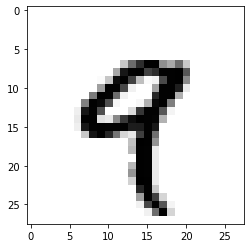

In [34]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [35]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [36]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [37]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

**코드 변동**

Keras is now fully intregrated into Tensorflow. So, importing only Keras causes error.

In [38]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [39]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2591 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1018 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0673 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0499 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0376 - accuracy: 0.9888


In [40]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0623 - accuracy: 0.9816


In [41]:
print('test_acc:', test_acc)

test_acc: 0.9815999865531921
